In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 6s 1us/step


In [3]:
# Normalize pixel values to range between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [4]:
# Reshape the images to (num_samples, 28, 28, 1) for convolutional neural networks
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


In [5]:
# Print the shape of the datasets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)


Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28, 1)
Testing labels shape: (10000,)


In [6]:
# Build the Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 51s 26ms/step - loss: 0.1427 - accuracy: 0.9579 - val_loss: 0.0627 - val_accuracy: 0.9786
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0460 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0445 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0409 - val_accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0500 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0487 - val_accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0471 -

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)


313/313 [==============================] - 2s 6ms/step - loss: 0.0490 - accuracy: 0.9867
Test accuracy: 0.9866999983787537


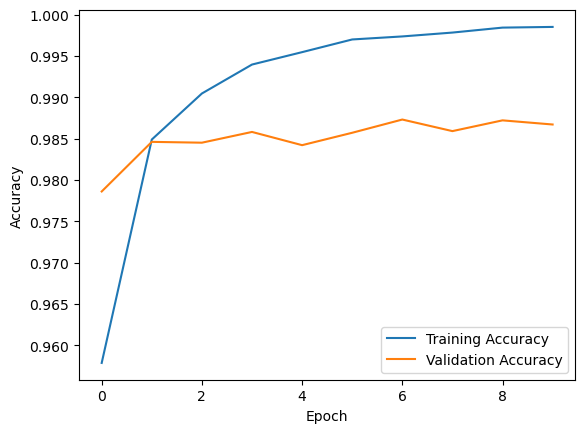

In [10]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
# Make predictions on a sample of test images
sample_images = test_images[:10]
predictions = model.predict(sample_images)


1/1 [==============================] - 1s 579ms/step


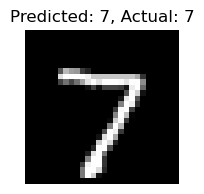

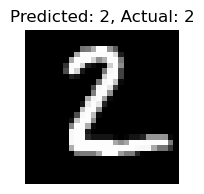

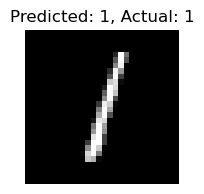

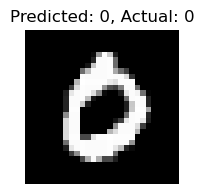

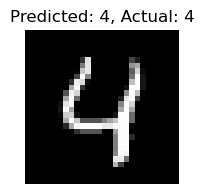

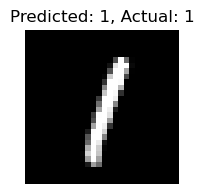

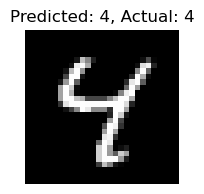

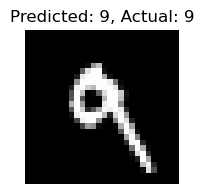

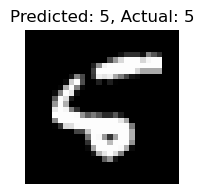

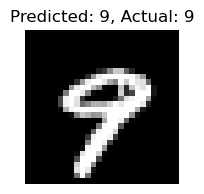

In [12]:

# Display the predictions and actual labels
for i in range(len(sample_images)):
    plt.figure(figsize=(2, 2))
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title("Predicted: %d, Actual: %d" % (np.argmax(predictions[i]), test_labels[i]))
    plt.axis('off')
    plt.show()
